<div style = "color: Black; 
              display: fill;
              border-radius: 20px;
              background-color: #FF0000;">
    <h1 id = "title"
        style = "padding: 13px; 
                 text-align:center;
                 color: White;
                 font-size: 40px;
                 font-weight: bold;
                 font-family: Times New Roman;">YouTube Video Analysis
    </h1>
</div>

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import json

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

sb.set() # set the default Seaborn style for graphics

In [2]:
data = pd.read_csv('yt_dataset.csv')
data.head()

,id,publishedAt,channelId,title,description,channelTitle,categoryId,duration,dimension,definition,caption,viewCount,likeCount,commentCount,Trending
0,Gg-GxtjLjWs,2023-03-23T01:53:16Z,UCd_EkHbEutirFl_XSrg95kA,Refs just gave the Warriors a free bucket 🤣 #s...,"✅ SUBSCRIBE, LIKE & COMMENT!\n----\n📌 TikTok: ...",GD's Highlights,17,PT17S,2d,hd,False,75870,7801,168,0
1,FjSQkixKIbE,2023-03-20T09:00:11Z,UC_YEeUix2bvVOuLxEUw2SnQ,"Vodro Ovodro | Bangla Natok | Sabuj, Rabina, I...",Vodro Ovodro - New Natok 2023 - Vodro Ovodro N...,Eagle Drama Series,24,PT26M59S,2d,hd,False,766521,20205,365,0
2,Ewo8tt6bgZU,2023-03-22T16:59:25Z,UCXuqSBlHAE6Xw-yeJA0Tunw,I THOUGHT I Wanted This,FlexiSpot’s Global Spring Sale is on now until...,Linus Tech Tips,28,PT19M36S,2d,hd,False,879553,37365,2430,0
3,sxWa7LTRvbo,2023-03-22T16:00:30Z,UC1sELGmy5jp5fQUugmuYlXQ,SNIFFER EGG HATCHING & 10 YEAR OLD BUG GETS FI...,Minecraft Monthly returns for its second editi...,Minecraft,20,PT6M35S,2d,hd,True,350503,35101,2193,1
4,WBk4t14wG44,2023-03-20T13:30:44Z,UC-LPIU24bQXVljUXivKEeRQ,Saath Nibhaana Saathiya | साथ निभाना साथिया | ...,Click here to Subscribe *Star Plus* : https://...,StarPlus,24,PT6M11S,2d,hd,False,440395,3549,24,0


In [3]:
data.shape

(311, 15)

In [4]:
data.dtypes

id              object
publishedAt     object
channelId       object
title           object
description     object
channelTitle    object
categoryId       int64
duration        object
dimension       object
definition      object
caption           bool
viewCount       object
likeCount       object
commentCount    object
Trending         int64
dtype: object

<div style = "color: Black; 
              display: fill;
              border-radius: 15px;
              background-color: #6abc1d;">
    <h2 id = "top-10-categories"
        style = "padding: 11px; 
                 text-align:center;
                 color: White;
                 font-size: 24px;
                 font-weight: bold;
                 font-family: Times New Roman;">Top Trending Videos by Categories
    </h2>
</div>

In [5]:
main_data =pd.DataFrame(data[['title','categoryId','viewCount']])

In [6]:
with open("category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
main_data['category_name'] = main_data['categoryId'].map(cat_dict)

In [7]:
main_data['category_name'].value_counts()

Entertainment           94
News & Politics         51
Gaming                  36
Sports                  27
Music                   26
People & Blogs          20
Education               11
Comedy                  10
Film & Animation        10
Autos & Vehicles         8
Howto & Style            4
Science & Technology     3
Travel & Events          3
Movies                   3
Pets & Animals           2
Shows                    1
Name: category_name, dtype: int64

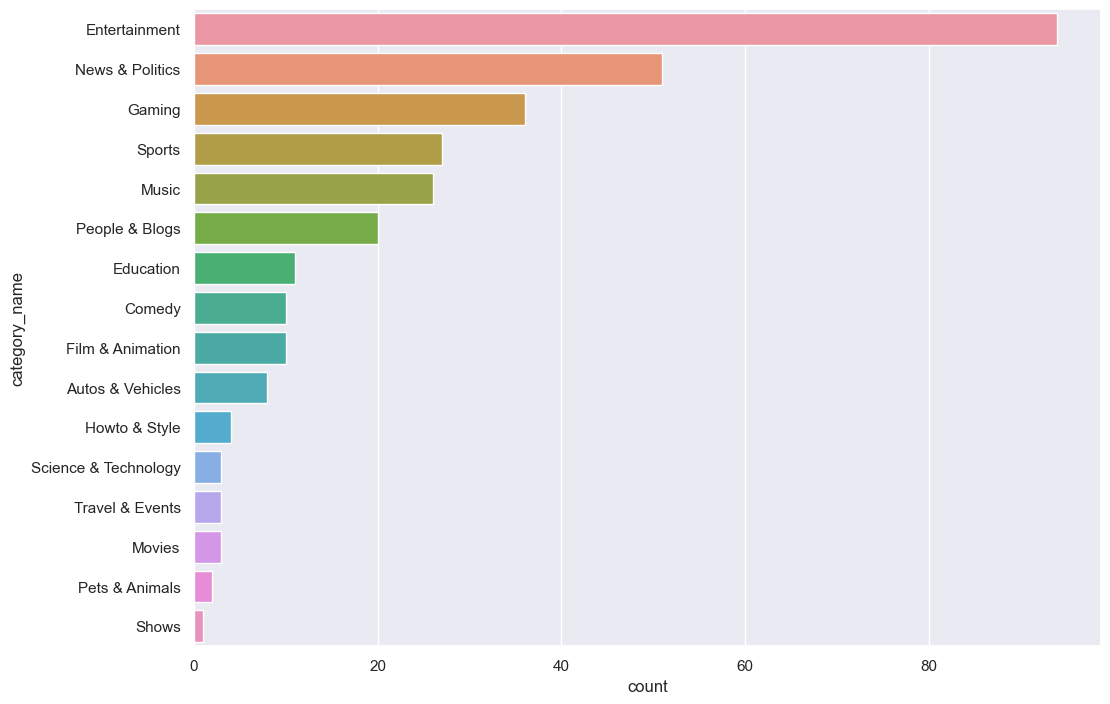

In [8]:
sb.set(rc={'figure.figsize':(11.7,8.27)})
sb.countplot(y = "category_name",data=main_data, order=main_data['category_name'].value_counts().index)
plt.show()